# Dataproject 
This data project is made by August Lohse, Nicolas Jalabert, Manon Schuegraf. 

In this project, we examine data from the OECD statistics bank. We look at data about greenhouse gas emissions and average wages in all OECD the countries. The project is structured such that we begin by importing, examining and cleaning our data. Afterwards, we estimate new variables and plot different descriptive statistics for the OECD countries. We finish the project by introducing an interactive model, that gives the reader data for whatever OECD country they would like. 

In [73]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Data import and cleaning
In this section we import the two datasets and clean them up one after the other. We begin by cleaning the enviromental dataset, afterwards we clean the wage dataset. 

### Enviromental data

In [74]:
# a. Import of enviromental data form the OECD statistics bank API
df = pdr.DataReader("AIR_GHG","oecd")
# b. Here we show the multi indexed structure of the enviromental data set
print(df.head())

Country                            Australia  \
Pollutant                   Greenhouse gases   
Variable   Total  emissions excluding LULUCF   
Year                                           
2010-01-01                        539171.826   
2011-01-01                        540445.363   
2012-01-01                        543593.864   
2013-01-01                        533313.692   
2014-01-01                        527325.581   

Country                                            \
Pollutant                                           
Variable   Total GHG excl. LULUCF, Index 1990=100   
Year                                                
2010-01-01                                128.344   
2011-01-01                                128.647   
2012-01-01                                129.396   
2013-01-01                                126.949   
2014-01-01                                125.524   

Country                                                  \
Pollutant                     

The envorimental data is multi-indexed, with hierachical columns. In the section below we make the enviromental dataset tidy instead.

In [ ]:
# a. The eviromental data is multi-indexed. Therefore we rearrange the index of the dataset
df.reset_index()
dir(df.index)
df.columns = [' '.join(col).strip() for col in df.columns.values]


In [76]:
# a In this section, we define a dictionary with all the countries and the countrycodes for the OECD countries
# b We need this in order to rearrange the data set
countries = ["Australia","Austria","Belgium","Canada","Chile","Czech Republic","Denmark","Estonia","Finland","France",
             "Germany","Greece","Hungary","Iceland","Ireland","Israel","Italy","Japan","Korea","Latvia","Lithuania",
             "Luxembourg","Mexico","Netherlands","New Zealand","Norway","Poland","Portugal","Slovak Republic",
             "Slovenia","Spain","Sweden","Switzerland","United Kingdom","United States"]
countrycode = ["AUS", "AUT", "BEL", "CAN", "CHL", "CZE", "DNK", "EST", "FIN", "FRA", "DEU","GRC", "HUN", "ISL", 
               "IRL", "ISR", "ITA", "JPN", "KOR", "LVA", "LTU", "LUX", "MEX", "NLD", "NZL", "NOR", "POL", "PRT",
               "SVK", "SVN", "SWE", "ESP", "CHE", "GBR", "USA"]

ccc = dict(zip(countries,countrycode))

In [77]:
# a. We make a tidy dataset, by making a row for each country in each year,
# b. Then we and add the variable "Greenhouse gases..." to this new data set
# c. I initiate an empty list for the dataset and set a counter to 0
x = []
i = 0
    # c.i. Iniate the for-loop that adds the rows to the dataset
for c in countries:
    for y in df.index.values :
        # c.ii. for each year in each country we append country name, countrycode, and total emissions_GHG
        x.append({"country" : c, "countrycode" : ccc[c],"emissions_GHG" : df[c+" "+"Greenhouse gases Total  emissions excluding LULUCF"][i]})
        #c.iii. We add 1 to the counter
        i = i + 1 
        #c.iiii. Since there are only 7 years for each country, we resent the counter when it reaches 6
        if i > 6 :
            i = 0
    # c.iiiii. Examening the new dataset  
df_env = pd.DataFrame(x)
df_env.head()


KeyError: 'Australia Greenhouse gases Total  emissions excluding LULUCF'

Now that we have a tidy dataset for enviromental data, we want to clean up the dataset for wages. 

### Wages data

In [40]:
# a. Import of locally placed OECD data on wages
df_wages= pd.read_csv("oecdwages.csv")
print("This is the first 5 rows of the wages dataset")
df_wages.head()
# b. We define the variables that we do not need in our analysis, and drop them. We do only need country, year and wages
drop_these= ["INDICATOR","FREQUENCY","MEASURE","SUBJECT", "Flag Codes"]
df_wages = df_wages.drop(drop_these, axis=1, inplace=False)

# c. We change the name of some of the variables
df_wages.rename(columns = {'LOCATION':'countrycode', 'Value' : 'average wage', 'TIME' : 'year'}, inplace=True)
df_wages.head()

This is the first 5 rows of the wages dataset


,countrycode,year,average wage
0,AUS,2010,48111.546431
1,AUS,2011,49621.840441
2,AUS,2012,49900.648070
3,AUS,2013,49648.772056
4,AUS,2014,49988.558205


## Merging data sets
In this section we combine our two datasets, in order to get one tidy dataset, that we can analyze. 
We begin by sorting the data sets by countrycode, then we merge them by countrycode. This could potentially be an issue if the data sets does not have the exact same years and countrycodes in the data, so we use a for loop to check each row of the data after we merge.

In [41]:
# a. Test of whether the datasets are good to merge, by looking at their shape 
print("Shape of eviromental dataset:" , df_env.shape)
print("Shape of wages dataset:" , df_wages.shape)
print("Since they both have the same amount of rows, they should be good to merge, after we sort by countrycode")

Shape of eviromental dataset: (245, 3)
Shape of wages dataset: (245, 3)
Since they both have the same amount of rows, they should be good to merge, after we sort by countrycode


In [42]:
# a. We defne the two datasets, and reset their index
left = df_wages.sort_values("countrycode")
left = left.reset_index()
rigth = df_env.sort_values("countrycode")
rigth = rigth.reset_index()

# b. We merge the two datasets with a left merge
data_all = left.merge(rigth,left_index=True,right_index=True)
data_all.head()

,index_x,countrycode_x,year,average wage,index_y,country,countrycode_y,emissions_GHG
0,0,AUS,2010,48111.546431,0,Australia,AUS,539171.826
1,1,AUS,2011,49621.840441,1,Australia,AUS,540445.363
2,2,AUS,2012,49900.648070,2,Australia,AUS,543593.864
3,3,AUS,2013,49648.772056,3,Australia,AUS,533313.692
4,4,AUS,2014,49988.558205,4,Australia,AUS,527325.581


 Now the wage dataset and the envoriment dataset have been merget into one. To make sure that they are correctly merged, we use an algorithm, that tells us if any of the two countrycode variables do not have identical values in a row. 

In [43]:
# a. This for-loop test whether or not the data has been merge correctly 
for i in data_all.index.values : 
    # a.i. This statement checks if all the rows have the same countrycode in the two countrycode variables
    if data_all["countrycode_x"][i]==data_all["countrycode_y"][i] :
        if i == data_all.index.values[-1] : 
            print("No mistakes in the mergin process")
    else :  
        print("mistake in "+data_all["country"][i])

No mistakes in the mergin process


The merge process did not lead to any mistakes, but it did lead to a few redundant variables that existed in both data set before. Therefore we delete these.

In [44]:
# a. This section drops the extra contrycode variable
drop_these= ["index_x","index_y","countrycode_y"]
data_all = data_all.drop(drop_these, axis=1, inplace=False)

data_all.rename(columns ={"countrycode_x":"countrycode"},inplace=True)

# b. Then we sort the dataset by countrycode and year, afterwards we reset the index
data_all = data_all.sort_values(by=["countrycode","year"])
data_all = data_all.reset_index(drop=True)
data_all.head()

,countrycode,year,average wage,country,emissions_GHG
0,AUS,2010,48111.546431,Australia,539171.826
1,AUS,2011,49621.840441,Australia,540445.363
2,AUS,2012,49900.648070,Australia,543593.864
3,AUS,2013,49648.772056,Australia,533313.692
4,AUS,2014,49988.558205,Australia,527325.581


## Creating new variables
Now that we have our dataset ready for analysis, we want create some new variables. The main thing that we want to exaimine, is whether changes in CO2 emissions and average wages follow a similar trend. Therefore we make a new variable, that is the percentage change from year to year, within each country. After this we examine the mean and median of this change.

In [45]:
# a. We use the apply method, and a discret function to make two new variables for percentage change
data_all['d_GHG'] = data_all.groupby('countrycode')['emissions_GHG'].apply(lambda x: x.pct_change())*100
data_all['d_aw'] = data_all.groupby('countrycode')['average wage'].apply(lambda x: x.pct_change())*100

# b. Inspect the new data - it should contain a NaN value for each country in the year 2010
data_all.head()

,countrycode,year,average wage,country,emissions_GHG,d_GHG,d_aw
0,AUS,2010,48111.546431,Australia,539171.826,NaN,NaN
1,AUS,2011,49621.840441,Australia,540445.363,0.236202,3.139151
2,AUS,2012,49900.648070,Australia,543593.864,0.582575,0.561865
3,AUS,2013,49648.772056,Australia,533313.692,-1.891149,-0.504755
4,AUS,2014,49988.558205,Australia,527325.581,-1.122812,0.684380


In [47]:
# a. We create and inspect both the mean and median of all of the OECD countries' change in greenhouse gas emissions
GHG_change = data_all.groupby("year").d_GHG.mean()
print("The mean of change in greenhouse gas emissions, in the OECD each",GHG_change)
print("The median change in greenhouse gas emissions in the OECD each", data_all.groupby("year").d_GHG.median())


The mean of change in greenhouse gas emissions, in the OECD each year
2010         NaN
2011    0.804072
2012    1.312742
2013   -1.077934
2014    0.590274
2015    1.091532
2016   -0.888182
Name: d_GHG, dtype: float64
The median change in greenhouse gas emissions in the OECD each year
2010         NaN
2011   -0.002202
2012    0.511658
2013   -0.866082
2014    0.202867
2015    1.173351
2016   -1.167081
Name: d_GHG, dtype: float64


As can be seen, both the mean and the meadian change in emission is both negative and positive in the 6 year period. This means that emissions has both gone up and down. This is in contrast to wages as seen below. Here we see that wages has moste gode up since 2010. 

In [48]:
# a. We create and inspect both the mean an median of all of the OECD countries' change in average wages
AW_change = data_all.groupby("year").d_aw.mean()
print("The mean of change in average wages, in the OECD each", AW_change)
print("The median of change in average wages, in the OECD each",data_all.groupby("year").d_aw.median())

The mean of change in average wages, in the OECD each year
2010         NaN
2011   -0.199425
2012    0.017790
2013    0.529560
2014    0.990512
2015    1.710150
2016    1.849174
Name: d_aw, dtype: float64
The median of change in average wages, in the OECD each year
2010         NaN
2011    0.007957
2012    0.215702
2013    0.558833
2014    0.684380
2015    1.502708
2016    1.298770
Name: d_aw, dtype: float64


## New functions

In this section we define the functions that we need to visualize the wages and emissions.

We define two new functions: information and translate. Information makes it easy and convinient to extract information on a specific country, year, variable or a combination, from the dataset. Translate tranlates a country name to a country code and vice verca. 

In [66]:
def information(country,year = 0,variable = True):
    """This function takes up to three arguments, the country code a and two optional ones: the year b and the variable. 
        Given these arguments it will return the GHG emissions and average wage of a specific 
        country depending on the year.
        
    args :
    
    country (str) : Required argument, which specifies the country for which information should be returned. It has to be the 
                country code of this country. The country code is the first column in the data base, three letters which are assigned to each country.
    year (float) : Optional argument, which allows to get information for only one specific year. By default the function will return
                all of the years for country a.
    variable (str) : Optional argument, which allows to get only the variable asked for. It can be assigned 
                "co2" to get the emissions or "wage" to get the average wage for country a. By default the function will retrun both variables.
                        
    returns :
    
    y(pandas.core.frame.DataFrame) : It return a table with the index, the years, the country, the average wage and the emission of GHG.
    """
    x = data_all[data_all["countrycode"] == country]
#define year and co2
    if year != 0 and variable == 'co2':
        d= x[data_all["year"] == year]
        f = d.loc[:, ["year", "country", "emissions_GHG"]]
        return f
#define year and wage
    elif year != 0 and variable == 'wage':
        d= x[data_all["year"] == year]
        g = d.loc[:, ["year", "country", "average wage"]]
        return g
 #define only co2
    elif year == 0 and variable == 'co2':
        d= x[data_all["year"] == year]
        return x.loc[:, ["year", "country", "emissions_GHG"]]
#define only wage
    elif year == 0 and variable == 'wage':
        g = x.loc[:, ["year", "country", "average wage"]]
        return x.loc[:, ["year", "country", "average wage"]]
#define only the year
    elif year != 0 : 
        h = x[data_all["year"] == year]
        return h.loc[:, ["year", "country", "average wage", "emissions_GHG"]]
#nothing define
    else :
        return x.loc[:, ["year", "country", "average wage", "emissions_GHG"]]

In [67]:
def translate(code = True, countrycode = True):
    """This function takes one argument. By default it is the code of the country and returns the name of the country. 
    Otherwise it returns the code, if you give it the name. 
    
    args:
    code(str): Is either the countrycode or the name of the country.
    countrycode(boolean): Defines if the argument code is the countrycode(True) or the name(False).
    
    return:
    c(str): Either the name or the countrycode.

    """
    i = 0
    if countrycode == True :
        c = str(data_all[data_all["countrycode"]==code]["country"].unique())
        c = c.replace("['","")
        c = c.replace("']","")
        return(c)
    elif countrycode == False :
        c = str(data_all[data_all["country"]==code]["countrycode"].unique())
        c = c.replace("['","")
        c = c.replace("']","")
        return(c)
    else : 
        return("check you'r spelling")

## Visual analysis
In this section, we visually present the results of our analysis. 

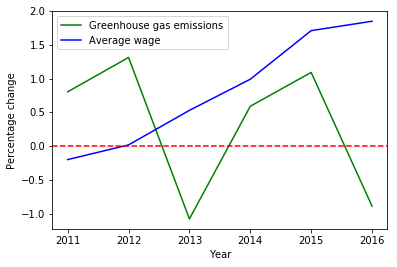

In [68]:
# a Plot 1 - Percentage change in CO2 emissions and wages over time 
plt.plot(GHG_change,color="g")
plt.plot(AW_change,color="b")
plt.xlabel("Year")
plt.ylabel("Percentage change")
plt.legend(["Greenhouse gas emissions","Average wage"])
plt.axhline(y=0,color="r",linestyle="dashed")
plt.show()

The graph shows the average change in both average wages and CO2 emissions for all OECD countries from year to year in the 2010-2016 period. We have created the plotted variable, GHG_change, in the section "Creating new variables" line 80. Though a rising trend in average wages for all OECD countries is distinguishable, greenhouse gas emissions have been subject to strong fluctuations, so that a connection between the two variables is not clear to see. 

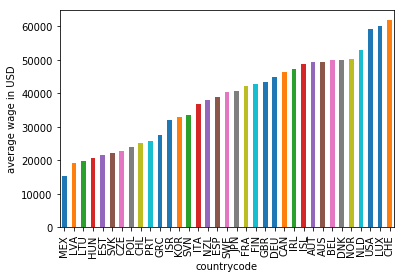

In [69]:
# a Plot 2: Average wages by country  
plt.clf
av_w_c= data_all.groupby("countrycode")["average wage"].mean().sort_values()
av_w_c.plot.bar()
plt.xlabel("countrycode")
plt.ylabel("average wage in USD")
plt.show()

This bar graph shows the average wages in US dollars for each OECD country over the 2010 - 2016 period. Our translation function in the section "New functions" line 84 provides the possibility to easily translate the country code to the country name. While the highest wages are earned in Switzerland, Mexico portrays the lowest average wages in the OECD.

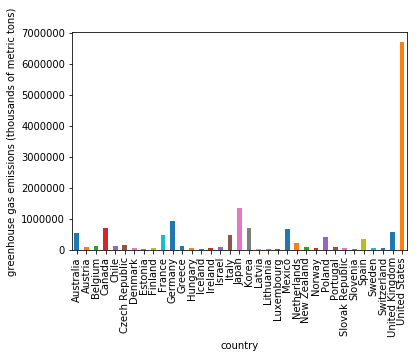

In [70]:
# a: Plot 3: Average CO2 emissions by country
plt.clf
av_e_c= data_all.groupby("country")["emissions_GHG"].mean()
plt.ylabel("greenhouse gas emissions (thousands of metric tons)")
plt.xlabel("countrycode")
av_e_c.plot.bar()
plt.show()

This very similar bar graph shows greenhouse gas emissions (in thousand metric tons) for all OECD countries between 2010 and 2016. While, among others, Japan and Germany have emitted sizable amounts of greenhouse gases, it is clear to see that the United States's emissions by far exceed that of any other OECD country. 

C:\Users\augus\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


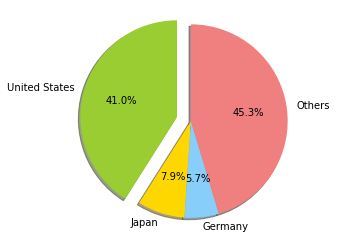

In [71]:
# a Plot 4: Pie chart of greenhouse gas emissions
plt.clf
united_state_d = information('USA', 2016)
country1 = float(united_state_d.loc[:,"emissions_GHG"])
japan_d = information('JPN', 2016)
country2 = float(japan_d.loc[:,"emissions_GHG"])
germany_d = information("DEU", 2016)
country3 = float(germany_d.loc[:,"emissions_GHG"])
others_d = data_all[(~data_all["countrycode"].isin(["USA","JAP","DEU"]))]
others_d = others_d[others_d['year'] == 2016]["emissions_GHG"]
others = float(np.nansum(others_d))

chart = [country1, country2, country3, others]
labels = 'United States', 'Japan', 'Germany', 'Others'
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
exp = [0.15 , 0, 0, 0]

fig1, chartg = plt.subplots()
chartg.pie(chart, explode=exp , labels=labels, colors=colors, autopct='%1.1f%%',  shadow=True, startangle=90)

chartg.axis('equal')
plt.show()

The radically high amount of total greenhouse gas emissions of the United States compared to other OECD countries (in 2016) is best depicted in this pie chart. We have used the information function described in the section "New functions" to get the emissions of the relevant countries in the year 2016. The index throws a warning, but it does not affect the functionallity of the code.

## Interactive model

This final interactive model gives all the relevant information portrayed in the visual analysis above, for each of the OECD countries. When chosing a country in the droop down menu, the interactive model gives you the mean of both greenhouse gas emissions and average wages and plots their percentage change over the 2010-2016 period. 

In [72]:
# a Plot 5: Interactive model
plt.clf
def get_con(Country = "Australia"):
    """Gives mean of greenhouse gas emissions and average wages as a float for the specified country. 
    Additionally, it shows a plot of the percentage change of the two variables over the 2010-2016 period. 
    As it is an interactive model, it gives the information for any OECD country.    
    
    args:
        Country(str): Specify the country as an argument for the function
            
    return
    Country name, mean of greenhouse gas emissions, mean of average wages and the plotted percentage changes in wages and emissions"""
        
        
    print("Country: "+ Country)
    print("Mean of Greenhouse gas emissions:" , round(information(translate(Country,countrycode=False))["emissions_GHG"].mean(),2))  
    print("Mean of average wages:" , round(information(translate(Country,countrycode=False))["average wage"].mean(),2))

    fig, ax = plt.subplots()
    fig.canvas.draw()
    plt.plot(data_all[data_all["country"]==Country]["d_GHG"],color="g")
    plt.plot(data_all[data_all["country"]==Country]["d_aw"],color="b")
    plt.xlabel("Year")
    plt.ylabel("Percentage change")
    labels= ["2010","2011","2012","2013","2014","2015","2016"]
    ax.set_xticklabels(labels) 
    plt.legend(["Greenhouse gas emissions","Average wage"])
    plt.axhline(y=0,color="r",linestyle="dashed")
    plt.show()

    return 

widgets.interact(get_con,Country=data_all["country"].unique())

interactive(children=(Dropdown(description='Country', options=('Australia', 'Austria', 'Belgium', 'Canada', 'S…

<function __main__.get_con(Country='Australia')>